_Neural Data Science_

Lecturer: Dr. Jan Lause, Prof. Dr. Philipp Berens

Tutors: Jonas Beck, Fabio Seel, Julius Würzler

Summer term 2025

Student names: <span style='background: yellow'>*FILL IN YOUR NAMES HERE* </span>

LLM Disclaimer: <span style='background: yellow'>*Did you use an LLM to solve this exercise? If yes, which one and where did you use it? [Copilot, Claude, ChatGPT, etc.]* </span>

# Coding Lab 3

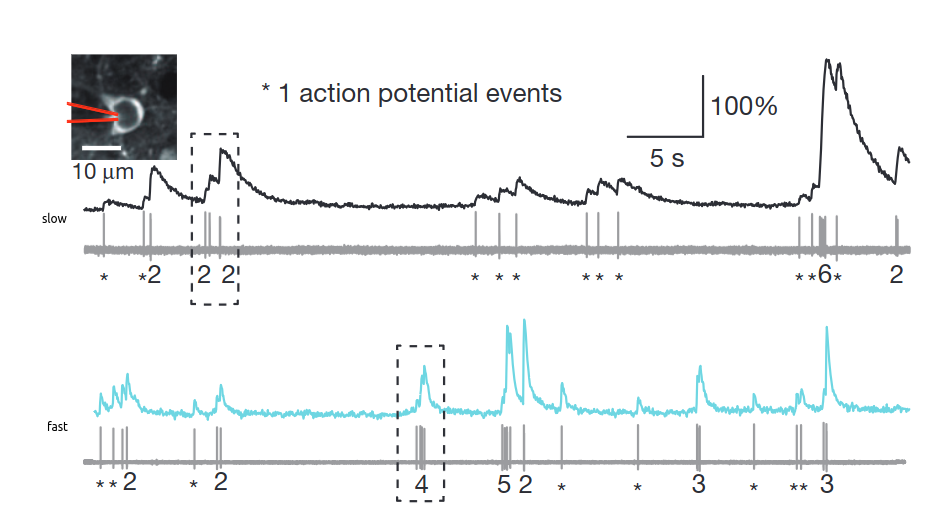

In this notebook you will work with 2 photon calcium recordings from mouse V1 and retina. For details see [Chen et al. 2013](https://www.nature.com/articles/nature12354) and [Theis et al. 2016](https://www.cell.com/neuron/pdf/S0896-6273(16)30073-3.pdf). Two-photon imaging is widely used to study computations in populations of neurons. 

In this exercise sheet we will study properties of different indicators and work on methods to infer spikes from calcium traces. All data is provided at a sampling rate of 100 Hz. For easier analysis, please resample it to 25 Hz. `scipy.signal.decimate` can help here, but note that it is only meant for continous signals. 

__Data__: Download the data file ```nds_cl_3_*.csv``` from ILIAS and save it in a subfolder ```../data/```. Note, some recordings were of shorter duration, hence their columns are padded. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from __future__ import annotations

%matplotlib inline

%load_ext jupyter_black

%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark -p sklearn

Last updated: 2025-05-06 22:50:29CEST

Python implementation: CPython
Python version       : 3.13.2
IPython version      : 9.0.2

sklearn: 1.6.1

numpy     : 2.2.3
pandas    : 2.2.3
seaborn   : 0.13.2
matplotlib: 3.10.1
scipy     : 1.15.2

Watermark: 2.5.0



In [3]:
plt.style.use("../matplotlib_style.txt")

## Load data

In [22]:
# ogb dataset from Theis et al. 2016 Neuron
ogb_calcium = pd.read_csv("../data/nds_cl_3_ogb_calcium.csv", header=0)
ogb_spikes = pd.read_csv("../data/nds_cl_3_ogb_spikes.csv", header=0)
print(f"[OGB] calcium: {ogb_calcium.shape}, spikes: {ogb_spikes.shape}")

# gcamp dataset from Chen et al. 2013 Nature
gcamp_calcium = pd.read_csv("../data/nds_cl_3_gcamp2_calcium.csv", header=0)
gcamp_spikes = pd.read_csv("../data/nds_cl_3_gcamp2_spikes.csv", header=0)
print(f"[GCaMP] calcium: {gcamp_calcium.shape}, spikes: {gcamp_spikes.shape}")

# spike dataframe
ogb_spikes.head()

[OGB] calcium: (71986, 11), spikes: (71986, 11)
[GCaMP] calcium: (23973, 37), spikes: (23973, 37)


,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0.0,0.0,0,0,0,0.0,0,0.0,0
1,0,0,0.0,0.0,0,1,0,0.0,0,0.0,0
2,0,0,0.0,0.0,0,0,0,0.0,0,0.0,0
3,0,0,0.0,0.0,0,1,0,0.0,0,0.0,0
4,0,0,0.0,0.0,0,0,0,0.0,0,0.0,0


## Task 1: Visualization of calcium and spike recordings

We start again by plotting the raw data - calcium and spike traces in this case. One dataset has been recorded using the synthetic calcium indicator OGB-1 at population imaging zoom (~100 cells in a field of view) and the other one using the genetically encoded indicator GCamp6f zooming in on individual cells. Plot the traces of an example cell from each dataset to show how spikes and calcium signals are related. A good example cell for the OGB-dataset is cell 5. For the CGamp-dataset a good example is cell 6. Align the traces by eye (add a small offset to the plot) such that a valid comparison is possible and zoom in on a small segment of tens of seconds.

*Grading: 3 pts*

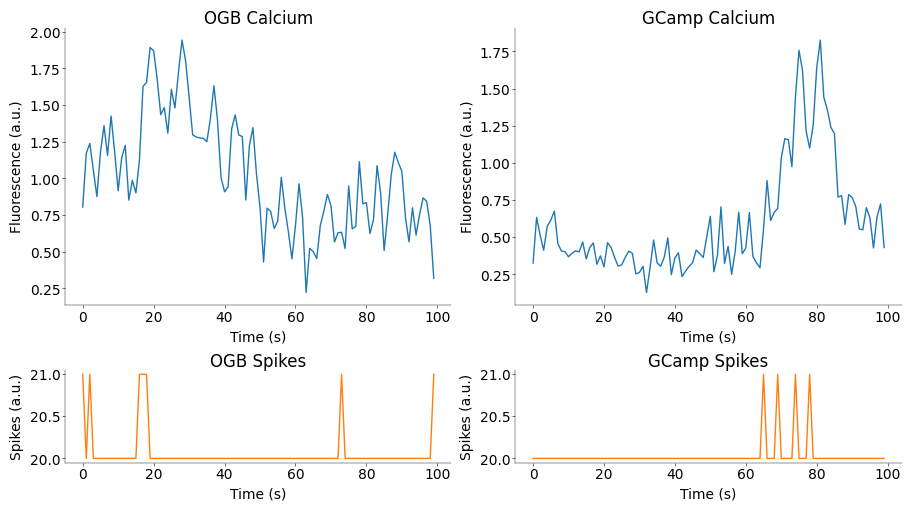

In [ ]:
# --------------------------------
# Resample and prepare data (1 pt)
# --------------------------------


# resampling
ogb_spikes_trace = ogb_spikes.groupby(ogb_spikes.index // 4).any().astype(int)

# filter
ogb_calcium_trace = pd.DataFrame(signal.decimate(ogb_calcium.fillna(0), q=4, n=4, axis=0), columns=ogb_calcium.columns)


# resampling
gcamp_spikes_trace = gcamp_spikes.groupby(gcamp_spikes.index // 4).any().astype(int)

# filter
gcamp_calcium_trace = pd.DataFrame(signal.decimate(gcamp_calcium.fillna(0), q=4, n=4, axis=0), columns=gcamp_calcium.columns)

fig, axs = plt.subplots(
    2, 2, figsize=(9, 5), height_ratios=[3, 1], layout="constrained"
)
# --------------------
# Plot OGB data (1 pt)
# --------------------

# Plot calcium data
axs[0, 0].plot(ogb_calcium_trace["5"][:100], color="C0", lw=1)
axs[0, 0].set_title("OGB Calcium")
axs[0, 0].set_ylabel("Fluorescence (a.u.)")
axs[0, 0].set_xlabel("Time (s)")
# Plot spikes data
axs[1, 0].plot(ogb_spikes_trace["5"][:100] + 20, color="C1", lw=1)
axs[1, 0].set_title("OGB Spikes")
axs[1, 0].set_ylabel("Spikes (a.u.)")
axs[1, 0].set_xlabel("Time (s)")


# ----------------------
# Plot GCamp data (1 pt)
# ----------------------
# Plot calcium data
axs[0, 1].plot(gcamp_calcium_trace["6"][:100], color="C0", lw=1)
axs[0, 1].set_title("GCamp Calcium")
axs[0, 1].set_ylabel("Fluorescence (a.u.)")
axs[0, 1].set_xlabel("Time (s)")
# Plot spikes data
axs[1, 1].plot(gcamp_spikes_trace["6"][:100] + 20, color="C1", lw=1)
axs[1, 1].set_title("GCamp Spikes")
axs[1, 1].set_ylabel("Spikes (a.u.)")
axs[1, 1].set_xlabel("Time (s)")
plt.show()

## Bonus Task (Optional): Calcium preprocessing

To improve the quality of the inferred spike trains, further preprocessing steps can undertaken. This includes filtering and smoothing of the calcium trace.

Implement a suitable filter and local averaging procedure as discussed in the lecture. Explain your choices and discuss how it helps!

_Grading: 1 BONUS point_

_BONUS Points do not count for this individual coding lab, but sum up to 5% of your **overall coding lab grade**. There are 4 BONUS points across all coding labs._

## Task 2: Simple deconvolution

It is clear from the above plots that the calcium events happen in relationship to the spikes. As a first simple algorithm implement a deconvolution approach like presented in the lecture in the function `deconv_ca`. Assume an exponential kernel where the decay constant depends on the indicator ($\tau_{OGB}= 0.5 s$, $\tau_{GCaMP}= 0.1 s$). Note there can be no negative rates! Plot the kernel as well as an example cell with true and deconvolved spike rates. Scale the signals such as to facilitate comparisons. You can use functions from `scipy` for this. Explain your results and your choice of kernel.

*Grading: 6 pts*


In [ ]:
from scipy.fft import fft, ifft


def deconv_ca(ca: np.ndarray, tau: float, dt: float = 0.0) -> np.ndarray:
    """Compute the deconvolution of the calcium signal.

    Parameters
    ----------

    ca: np.array, (n_points,)
        Calcium trace

    tau: float
        decay constant of conv kernel

    dt: float
        sampling interval.

    Return
    ------

    sp_hat: np.array
    """

    # --------------------------------------------
    # apply devonvolution to calcium signal (1 pt)
    # --------------------------------------------
    n_points = len(ca)

    # Create the exponential decay kernel
    t = np.arange(0, n_points * dt, dt)
    kernel = np.exp(-t / tau)
    kernel = kernel[:n_points]

    # FFT of signal and kernel
    ca_fft = fft(ca)
    kernel_fft = fft(kernel)

    # Avoid division by zero or very small values
    eps = 1e-10
    kernel_fft[kernel_fft == 0] = eps

    # deconvolve
    deconv_fft = ca_fft / kernel_fft[:, np.newaxis]

    # Inverse FFT 
    sp_hat = np.real(ifft(deconv_fft))

    return sp_hat

In [121]:
def deconv_ca(ca: np.ndarray, tau: float, dt: float = 0.0) -> np.ndarray:
    """Compute the deconvolution of the calcium signal.

    Parameters
    ----------

    ca: np.array, (n_points,)
        Calcium trace

    tau: float
        decay constant of conv kernel

    dt: float
        sampling interval.

    Return
    ------

    sp_hat: np.array
    """

    # --------------------------------------------
    # apply devonvolution to calcium signal (1 pt)
    # --------------------------------------------
    n_points = ca.size
    t = np.linspace(0, n_points / 100, n_points)
    kernel = np.exp(-t / tau)
    sp_hat = signal.deconvolve(ca, kernel)[0]
    return sp_hat

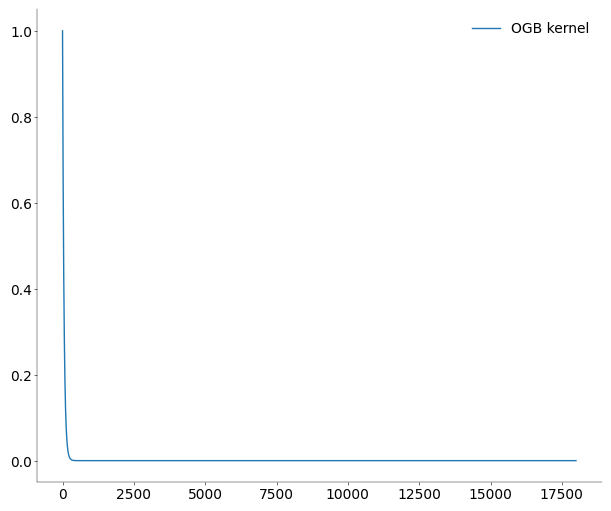

In [122]:
# -------------------------
# Plot the 2 kernels (1 pt)
# -------------------------
fig, ax = plt.subplots(figsize=(6, 5), layout="constrained")

tau = 0.5
dt = 0.01
n_points = len(ogb_calcium_trace["5"])

# Create the exponential decay kernel
t = np.arange(0, n_points * dt, dt)
kernel = np.exp(-t / tau)
kernel = kernel[:n_points]

kernel_OGB = np.exp(-0.1 * t)
kernel_GCaMP = np.exp(-0.1 * t)
ax.plot(kernel, label="OGB kernel")
ax.legend()

### Questions (1 pt)
1) Explain how you constructed the kernels

YOUR ANSWER HERE

2) How do the indicators / kernels compare?

YOUR ANSWER HERE

3) What are pros and cons of each indicator?

YOUR ANSWER HERE

In [123]:
sp_hat_gcamp

array([[ 0.00582874,  0.00606044, -0.00274403, ...,  0.00485839,
         0.00907229,  0.01144058],
       [ 0.00972467,  0.01713336,  0.0002432 , ..., -0.00123607,
         0.00637173,  0.01096629],
       [ 0.00760878,  0.00812501,  0.00939101, ...,  0.00771919,
         0.00754712,  0.00749301],
       ...,
       [ 0.06106856,  0.01656851,  0.0276511 , ...,  0.00673066,
         0.0157879 ,  0.01097888],
       [ 0.05821997,  0.01440509,  0.02678588, ...,  0.0047931 ,
         0.01531473,  0.00855437],
       [ 0.03101477,  0.01743215,  0.01631201, ...,  0.00019585,
        -0.00012554,  0.00025195]], shape=(5994, 37))

              0         1              2         3         4         5  \
0     -0.235569  0.679824   2.554052e+00  0.637719 -0.018047  0.804737   
1     -0.044009  0.786543   2.270646e+00  1.067246  0.022076  1.171432   
2      0.342132  1.406578   2.451614e+00  1.121927  0.169024  1.238440   
3      0.487334  1.620956   1.807650e+00  0.335996  0.591351  1.055948   
4      0.446631  1.425681   2.133006e+00  0.668669  0.299985  0.875915   
...         ...       ...            ...       ...       ...       ...   
17992  0.233572  0.468312  4.446591e-323  1.377326 -0.146640  1.188205   
17993  0.273154  0.602876  4.446591e-323  1.359786 -0.175473  1.232186   
17994  0.448661  0.471884  4.446591e-323  1.314696 -0.184667  1.157115   
17995  0.580739  0.180860  4.446591e-323  1.029989 -0.128890  1.288366   
17996  0.257651  0.405029  4.446591e-323  0.368577 -0.157876  1.083631   

              6         7         8              9        10  
0      2.424005  0.385910  0.221953   1.544482e+

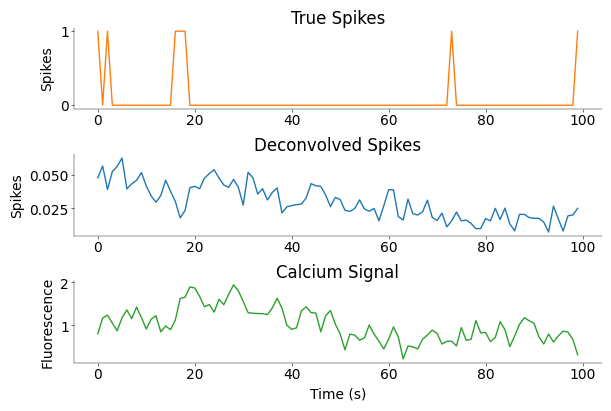

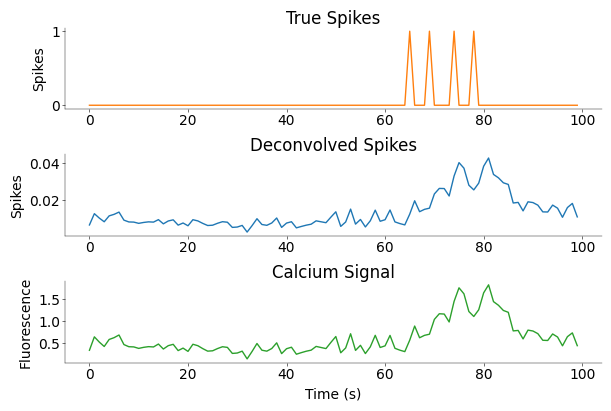

In [134]:
# ----------------------------------------------------------------------
# Compare true and deconvolved spikes rates for the OGB and GCamP cells.
# What do you notice? Why is that? (3 pts)
# ----------------------------------------------------------------------


# OGB Cell

sp_hat_ogb = deconv_ca(ogb_calcium_trace, tau=0.5, dt=0.01)
print(ogb_calcium_trace)
print(sp_hat_ogb)

fig, axs = plt.subplots(
    3, 1, figsize=(6, 4), height_ratios=[1, 1, 1], gridspec_kw=dict(hspace=0)
)

# plot true spiles

axs[0].plot(ogb_spikes_trace["5"][:100], color="C1", lw=1)
axs[0].set_title("True Spikes")
axs[0].set_ylabel("Spikes")
# plot deconvolved spikes
axs[1].plot(sp_hat_ogb[:, 6][:100], color="C0", lw=1)
axs[1].set_title("Deconvolved Spikes")
axs[1].set_ylabel("Spikes")
# plot calcium signal
axs[2].plot(ogb_calcium_trace["5"][:100], color="C2", lw=1)
axs[2].set_title("Calcium Signal")
axs[2].set_ylabel("Fluorescence")
axs[2].set_xlabel("Time (s)")

# GCamp Cell

sp_hat_gcamp = deconv_ca(gcamp_calcium_trace, tau=0.5, dt=0.01)


fig, axs = plt.subplots(
    3, 1, figsize=(6, 4), height_ratios=[1, 1, 1], gridspec_kw=dict(hspace=0)
)

# plot true spiles
axs[0].plot(gcamp_spikes_trace["6"][:100], color="C1", lw=1)
axs[0].set_title("True Spikes")
axs[0].set_ylabel("Spikes")
# plot deconvolved spikes
axs[1].plot(sp_hat_gcamp[:, 6][:100], color="C0", lw=1)
axs[1].set_title("Deconvolved Spikes")
axs[1].set_ylabel("Spikes")
# plot calcium signal
axs[2].plot(gcamp_calcium_trace["6"][:100], color="C2", lw=1)
axs[2].set_title("Calcium Signal")
axs[2].set_ylabel("Fluorescence")
axs[2].set_xlabel("Time (s)")

plt.show()

## Task 3: Run more complex algorithm

As reviewed in the lecture, a number of more complex algorithms for inferring spikes from calcium traces have been developed. Run an implemented algorithm on the data and plot the result. There is a choice of algorithms available, for example:

* Vogelstein: [oopsi](https://github.com/liubenyuan/py-oopsi)
* Theis: [c2s](https://github.com/lucastheis/c2s)
* Friedrich: [OASIS](https://github.com/j-friedrich/OASIS)

*Grading: 3 pts*



In [103]:
# run this cell to download the oopsi.py file and put it in the same folder as this notebook
#!wget https://raw.githubusercontent.com/liubenyuan/py-oopsi/master/oopsi.py
!curl -o oopsi.py https://raw.githubusercontent.com/liubenyuan/py-oopsi/master/oopsi.py

# Fix for the ImportError by replacing the deprecated import
from scipy.sparse.linalg.dsolve import linsolve

# Import the oopsi module
import oopsi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7973  100  7973    0     0   109k      0 --:--:-- --:--:-- --:--:--  109k


ImportError: cannot import name 'linsolve' from 'scipy.sparse.linalg.dsolve' (/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/sparse/linalg/dsolve.py)

In [ ]:
# ----------------------------------------------------------------------
# Apply one of the advanced algorithms to the OGB and GCamp Cells (1 pt)
# ----------------------------------------------------------------------
# OGB Cell
complex_result = oopsi.oopsi(
    ogb_calcium_trace.values
)
# GCamp Cell
complex_result_gcamp = oopsi.oopsi(
    gcamp_calcium_trace.values
)

NameError: name 'complex_result' is not defined

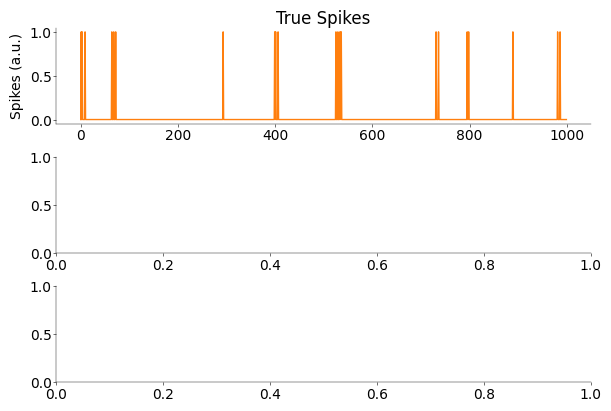

In [ ]:
# -------------------------------------------------------------------------------
# Plot the results for the OGB and GCamp Cells and describe the results (1+1 pts)
# -------------------------------------------------------------------------------


# OGB Cell

fig, axs = plt.subplots(
    3, 1, figsize=(6, 4), height_ratios=[1, 1, 1], gridspec_kw=dict(hspace=0)
)

# plot true spiles
axs[0].plot(ogb_spikes_trace["5"][:100], color="C1", lw=1)
axs[0].set_title("True Spikes")
axs[0].set_ylabel("Spikes (a.u.)")
# plot deconvolved spikes
axs[1].plot(complex_result[0], color="C0", lw=1)
axs[1].set_title("Deconvolved Spikes")
axs[1].set_ylabel("Spikes (a.u.)")
# plot calcium signal
axs[2].plot(ogb_calcium_trace["5"][:100], color="C2", lw=1)
axs[2].set_title("Calcium Signal")

# GCamP Cell

fig, axs = plt.subplots(
    3, 1, figsize=(6, 4), height_ratios=[1, 1, 1], gridspec_kw=dict(hspace=0)
)

# plot true spiles
axs[0].plot(gcamp_spikes_trace["6"][:100], color="C1", lw=1)
axs[0].set_title("True Spikes")
axs[0].set_ylabel("Spikes (a.u.)")
# plot deconvolved spikes
axs[1].plot(complex_result_gcamp[0], color="C0", lw=1)
axs[1].set_title("Deconvolved Spikes")
axs[1].set_ylabel("Spikes (a.u.)")
# plot calcium signal
axs[2].plot(gcamp_calcium_trace["6"][:100], color="C2", lw=1)
axs[2].set_title("Calcium Signal")
axs[2].set_ylabel("Fluorescence (a.u.)")
axs[2].set_xlabel("Time (s)")
plt.legend(
    ["True Spikes", "Deconvolved Spikes", "Calcium Signal"],
    loc="upper right",
    fontsize=8,
    frameon=False,
)
plt.show()

## Task 4: Evaluation of algorithms

To formally evaluate the algorithms on the two datasets run the deconvolution algorithm and the more complex one on all cells and compute the correlation between true and inferred spike trains. `DataFrames` from the `pandas` package are a useful tool for aggregating data and later plotting it. Create a dataframe with columns

* algorithm
* correlation
* indicator

and enter each cell. Plot the results using `stripplot` and/or `boxplot` in the `seaborn` package. Note these functions provide useful options for formatting the
plots. See their documentation, i.e. `sns.boxplot?`.

*Grading: 5 pts*


First, evaluate on OGB data and create OGB dataframe. Then repeat for GCamp and combine the two dataframes.

In [ ]:
# ----------------------------------------------------------
# Evaluate the algorithms on the OGB and GCamp cells (2 pts)
# ----------------------------------------------------------

correlation_ogb_1 = np.mean(
    np.abs(ogb_spikes_trace["5"] - sp_hat_ogb[:, 5])
)  # Deconvolution
correlation_ogb_2 = np.mean(
    np.abs(ogb_spikes_trace["5"] - complex_result[0][:, 5])
)  # Advanced Algorithm

correlation_gcamp_1 = np.mean(
    np.abs(gcamp_spikes_trace["6"] - sp_hat_gcamp[:, 6])
)  # Deconvolution
correlation_gcamp_2 = np.mean(
    np.abs(gcamp_spikes_trace["6"] - complex_result_gcamp[0][:, 6])
)  # Advanced Algorithm


In [ ]:
# -------------------------------
# Construct the dataframe (1 pts)
# -------------------------------

data = {
    "Algorithm": ["Deconvolution", "Advanced Algorithm"] * 2,
    "Cell": ["OGB"] * 2 + ["GCamp"] * 2,
    "Correlation": [
        correlation_ogb_1,
        correlation_ogb_2,
        correlation_gcamp_1,
        correlation_gcamp_2,
    ]
}
df = pd.DataFrame(data)

Combine both dataframes. Plot the performance of each indicator and algorithm. You should only need a single plot for this.

In [ ]:
# ----------------------------------------------------------------------------
# Create Strip/Boxplot for both cells and algorithms Cell as described. (1 pt)
# Describe and explain the results briefly. (1 pt)
# ----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(6, 6), layout="constrained")


# Create a boxplot
sns.boxplot(
    x="Cell", y="Correlation", hue="Algorithm", data=df, palette="Set2", ax=ax
)
# Add stripplot
sns.stripplot(
    x="Cell", y="Correlation", hue="Algorithm", data=df, palette="Set2", ax=ax
)
# Set title and labels
ax.set_title("Correlation between True and Estimated Spikes")
ax.set_xlabel("Cell Type")
ax.set_ylabel("Correlation")
plt.legend(title="Algorithm", loc="upper right")
plt.show()